In [1]:
from transformers.trainer_utils import set_seed

In [2]:
#シード値を設定
set_seed(1234)

In [6]:
from pprint import pprint
from datasets import load_dataset

#HuggingFaceHubのlim-book/JGLUEリポジトリから
#MARC-jaのデータを読み込む

train_data = load_dataset(
    "shunk031/JGLUE", name="MARC-ja", split="train"
)

valid_data = load_dataset(
    "shunk031/JGLUE", name="MARC-ja", split="validation"
)

pprint(train_data)

Extracting data files: 100%|██████████| 3/3 [00:00<00:00, 1853.43it/s]
C:\Users\yuhei\.cache\huggingface\modules\datasets_modules\datasets\shunk031--JGLUE\bef660b0971cf102c95d2554bd2552ce5fb1cf8e9223cc6f8001c70be571c18c\JGLUE.py:464: UserWarning: can't import `mojimoji`, failing back to method that do nothing. We recommend running `pip install mojimoji` to reproduce the original preprocessing.
  warnings.warn(
C:\Users\yuhei\.cache\huggingface\modules\datasets_modules\datasets\shunk031--JGLUE\bef660b0971cf102c95d2554bd2552ce5fb1cf8e9223cc6f8001c70be571c18c\JGLUE.py:480: UserWarning: can't import `beautifulsoup4`, failing back to method that do nothing.We recommend running `pip install beautifulsoup4` to reproduce the original preprocessing.
  warnings.warn(
"None of [Index(['review_body', 'star_rating', 'review_id'], dtype='object')] are in the [columns]"
Extracting data files: 100%|██████████| 2/2 [00:00<00:00, 1977.05it/s]
Generating train split: 187528 examples [00:03, 61236.27 exam

Dataset({
    features: ['sentence', 'label', 'review_id'],
    num_rows: 187528
})


In [14]:
#labelが極性ラベルを示している(positive = 0, negative = 1, neutral = 2)
pprint(train_data[0])
pprint(train_data.features)

{'label': 0,
 'review_id': 'R2H83XHJUDZBHT',
 'sentence': '以前職場の方にこれをみて少しでも元氣になってくださいと手渡して、早３年。返してくれと一度言ったが、結局返ってこなかった。６年前にも、職場の（といっても海外ですが）英語の先生に貸したら、これは素晴らしい！と言って、授業でも何度も生徒に見せたり、家でも見てたりしたそうで、結局帰国までに返してもらえなかった。。。この作品、結局３回購入してます。とほほでありつつ、誰かの心の支えになってくれればと願いつつ。エンディングの曲も好きです。あー、自分も突き進む人生を歩みたい。結婚もしたいが。。。'}
{'label': ClassLabel(names=['positive', 'negative', 'neutral'], id=None),
 'review_id': Value(dtype='string', id=None),
 'sentence': Value(dtype='string', id=None)}


In [22]:
from transformers import AutoTokenizer

#sentenceをサブワードに分割する
model_name = "cl-tohoku/bert-base-japanese-v3"
tokenizer = AutoTokenizer.from_pretrained(model_name)

pprint(tokenizer.tokenize(train_data[0]["sentence"]))

['以前',
 '職場',
 'の',
 '方',
 'に',
 'これ',
 'を',
 'み',
 'て',
 '少し',
 'で',
 'も',
 '元',
 '##氣',
 'に',
 'なっ',
 'て',
 'ください',
 'と',
 '手',
 '##渡し',
 'て',
 '、',
 '早',
 '3',
 '年',
 '。',
 '返し',
 'て',
 'くれ',
 'と',
 '一',
 '度',
 '言っ',
 'た',
 'が',
 '、',
 '結局',
 '返',
 '##っ',
 'て',
 'こ',
 'なかっ',
 'た',
 '。',
 '6',
 '年',
 '前',
 'に',
 'も',
 '、',
 '職場',
 'の',
 '(',
 'と',
 'いっ',
 'て',
 'も',
 '海外',
 'です',
 'が',
 ')',
 '英語',
 'の',
 '先生',
 'に',
 '貸し',
 'たら',
 '、',
 'これ',
 'は',
 '素晴らしい',
 '!',
 'と',
 '言っ',
 'て',
 '、',
 '授業',
 'で',
 'も',
 '何',
 '度',
 'も',
 '生徒',
 'に',
 '見せ',
 'たり',
 '、',
 '家',
 'で',
 'も',
 '見',
 'て',
 'たり',
 'し',
 'た',
 'そう',
 'で',
 '、',
 '結局',
 '帰国',
 'まで',
 'に',
 '返し',
 'て',
 'もらえ',
 'なかっ',
 'た',
 '。',
 '。',
 '。',
 'この',
 '作品',
 '、',
 '結局',
 '3',
 '回',
 '購入',
 'し',
 'て',
 'ます',
 '。',
 'と',
 '##ほ',
 '##ほ',
 'で',
 'あり',
 'つつ',
 '、',
 '誰',
 'か',
 'の',
 '心',
 'の',
 '支え',
 'に',
 'なっ',
 'て',
 'くれ',
 '##れ',
 'ば',
 'と',
 '願い',
 'つつ',
 '。',
 'エンディング',
 'の',
 '曲',
 'も',
 '好き',
 'です',
 '。',
 'あ',
 '##ー',


In [29]:
encode_input = tokenizer("これはテストです。セグメント埋め込みはどうか？")

pprint(encode_input)

{'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'input_ids': [2,
               12538,
               465,
               14985,
               13037,
               385,
               32668,
               17293,
               13475,
               465,
               13500,
               429,
               46,
               3],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


In [30]:
#文頭と文末のトークンを確認
pprint(tokenizer.convert_ids_to_tokens(encode_input["input_ids"]))

['[CLS]',
 'これ',
 'は',
 'テスト',
 'です',
 '。',
 'セグメント',
 '埋め',
 '##込み',
 'は',
 'どう',
 'か',
 '?',
 '[SEP]']


100%|██████████| 5654/5654 [00:01<00:00, 3345.42it/s]


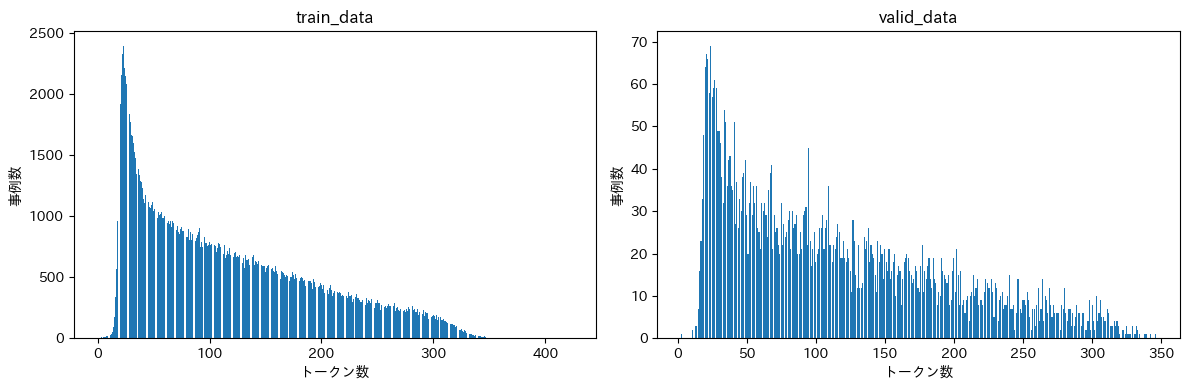

In [43]:
import matplotlib.pyplot as plt
import japanize_matplotlib
from datasets import Dataset
from tqdm import tqdm
from collections import Counter

#文章の長さごとにヒストグラムで表示し、外れ値などを調べる


def visualize_text_length(dataset, data_type, ax):
    length_counter = Counter()

    for data in tqdm(dataset):
        text_length = len(tokenizer.tokenize(data["sentence"]))
        length_counter[text_length] += 1

    ax.bar(length_counter.keys(), length_counter.values())
    ax.set_xlabel("トークン数")
    ax.set_ylabel("事例数")
    ax.set_title(data_type)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
visualize_text_length(train_data, "train_data", ax1)
visualize_text_length(valid_data, "valid_data", ax2)
plt.tight_layout()
plt.show()

In [45]:
#例示として、長さが20未満の文章を表示する
for data in valid_data:
    if len(tokenizer.tokenize(data["sentence"])) < 20:
        pprint(data)

{'label': 0,
 'review_id': 'R2DBP8X6BZK95',
 'sentence': '思った以上の良い物でした、探す手間もなくアマゾンで購入できて最高'}
{'label': 0,
 'review_id': 'RAUR61B2XR3XU',
 'sentence': '視覚的に直感で使用出来るのでとても使いやすく便利。おすすめです。'}
{'label': 1,
 'review_id': 'R10ULPB5A6X1NN',
 'sentence': '関節が終わっているこの程度のおもちゃにこの値段はありえない'}
{'label': 0,
 'review_id': 'RU3QT3ZX38NH2',
 'sentence': '全曲最高！！特に夏に聴きたくなるアルバムです。さすがはキース！！'}
{'label': 0,
 'review_id': 'R24CZPGQ1WK18H',
 'sentence': 'フルーツ忍者との連携がいい。クリアすれば得点も手にはいるしグッド'}
{'label': 0,
 'review_id': 'R2BTDZFXSFDO5A',
 'sentence': 'パソコンで見ています。英語の勉強になります。ありがとうございました。'}
{'label': 0,
 'review_id': 'R1M0ZS3YN88GXF',
 'sentence': '子供のリクエストで購入しました。とても気に入っているようです。'}
{'label': 0,
 'review_id': 'R1OSIMHHSOM2FC',
 'sentence': 'もし、今購入するなら間違いなくブルーレイを買います内容は最高'}
{'label': 0,
 'review_id': 'R2CDYM4SAP1JKD',
 'sentence': '「GODZILLA2014」 、素直に大好きなんで楽しみです！！'}
{'label': 0,
 'review_id': 'R3FS6YHGTU00VK',
 'sentence': 'この時代のレインボー好きには最高です。会場で見たかったです。'}
{'label': 0,
 'review_id': 'RI1YYV32BG81Z',
 'sentence': 'なかなか楽しいゲームで

100%|██████████| 5654/5654 [00:00<00:00, 59568.99it/s]


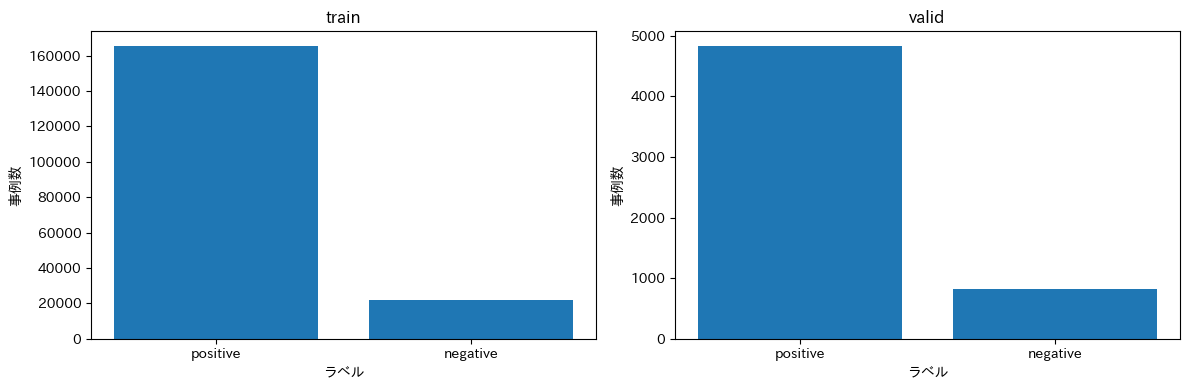

In [46]:
#文章の極性ラベルごとの数を調べる

def visualize_label(dataset, data_type, ax):
    length_counter = Counter()

    label_names = ["positive", "negative", "neutral"]
    for data in tqdm(dataset):
        label_number = data["label"]
        label_name = label_names[label_number]
        length_counter[label_name] += 1

    ax.bar(length_counter.keys(), length_counter.values())
    ax.set_xlabel("ラベル")
    ax.set_ylabel("事例数")
    ax.set_title(data_type)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
visualize_label(train_data, "train", ax1)
visualize_label(valid_data, "valid", ax2)
plt.tight_layout()
plt.show()

['以前', '職場', 'の', '方', 'に', 'これ', 'を', 'み', 'て', '少し', 'で', 'も', '元', '##氣', 'に', 'なっ', 'て', 'ください', 'と', '手', '##渡し', 'て', '、', '早', '3', '年', '。', '返し', 'て', 'くれ', 'と', '一', '度', '言っ', 'た', 'が', '、', '結局', '返', '##っ', 'て', 'こ', 'なかっ', 'た', '。', '6', '年', '前', 'に', 'も', '、', '職場', 'の', '(', 'と', 'いっ', 'て', 'も', '海外', 'です', 'が', ')', '英語', 'の', '先生', 'に', '貸し', 'たら', '、', 'これ', 'は', '素晴らしい', '!', 'と', '言っ', 'て', '、', '授業', 'で', 'も', '何', '度', 'も', '生徒', 'に', '見せ', 'たり', '、', '家', 'で', 'も', '見', 'て', 'たり', 'し', 'た', 'そう', 'で', '、', '結局', '帰国', 'まで', 'に', '返し', 'て', 'もらえ', 'なかっ', 'た', '。', '。', '。', 'この', '作品', '、', '結局', '3', '回', '購入', 'し', 'て', 'ます', '。', 'と', '##ほ', '##ほ', 'で', 'あり', 'つつ', '、', '誰', 'か', 'の', '心', 'の', '支え', 'に', 'なっ', 'て', 'くれ', '##れ', 'ば', 'と', '願い', 'つつ', '。', 'エンディング', 'の', '曲', 'も', '好き', 'です', '。', 'あ', '##ー', '、', '自分', 'も', '突き', '##進', '##む', '人生', 'を', '歩み', 'たい', '。', '結婚', 'も', 'し', 'たい', 'が', '。', '。', '。']


In [56]:
#データセットに対する前処理

def preprocess_dataset(data):
    encoded = tokenizer(data["sentence"], max_length=512)
    encoded["labels"] = data["label"]

    return encoded

encoded_train_data = train_data.map(
    preprocess_dataset,
    remove_columns=train_data.column_names
)

encoded_valid_data = valid_data.map(
    preprocess_dataset,
    remove_columns=valid_data.column_names
)

Map: 100%|██████████| 5654/5654 [00:02<00:00, 2176.62 examples/s]


In [61]:
print(encoded_train_data[0])

{'input_ids': [2, 13204, 23886, 464, 2683, 461, 12538, 500, 481, 456, 15066, 457, 484, 913, 11226, 461, 12493, 456, 14281, 458, 2391, 18351, 456, 384, 2702, 34, 2002, 385, 21709, 456, 14982, 458, 601, 2023, 14120, 449, 430, 384, 15171, 5986, 7126, 456, 437, 12581, 449, 385, 37, 2002, 1039, 461, 484, 384, 23886, 464, 23, 458, 12737, 456, 484, 14087, 13037, 430, 24, 12566, 464, 15637, 461, 19219, 13123, 384, 12538, 465, 23845, 16, 458, 14120, 456, 384, 16050, 457, 484, 742, 2023, 484, 13619, 461, 13497, 12727, 384, 1781, 457, 484, 5538, 456, 12727, 441, 449, 13325, 457, 384, 15171, 14563, 12519, 461, 21709, 456, 24003, 12581, 449, 385, 385, 385, 12499, 12611, 384, 15171, 34, 1423, 13929, 441, 456, 12995, 385, 458, 7446, 7446, 457, 12517, 13819, 384, 5640, 429, 464, 2149, 464, 17481, 461, 12493, 456, 14982, 7203, 466, 458, 16584, 13819, 385, 14902, 464, 2790, 484, 13588, 13037, 385, 420, 7053, 384, 12731, 484, 15581, 8793, 7349, 15750, 500, 27774, 13030, 385, 13125, 484, 441, 13030, 430, 

In [65]:
#ミニバッチ化
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
batch_input = data_collator(encoded_train_data[0:4])
print(batch_input["input_ids"].size())

torch.Size([4, 175])


In [68]:
#モデル構築

from transformers import AutoModelForSequenceClassification

class_label = train_data.features["label"]
label2id = {label:id for id, label in enumerate(class_label.names)}
id2label = {id:label for id, label in enumerate(class_label.names)}

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=class_label.num_classes,
    label2id = label2id,
    id2label = id2label
)



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cl-tohoku/bert-base-japanese-v3 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
